In [41]:
### Run this cell before continuing. 
library(tidyverse)
library(repr)
library(scales)
options(repr.matrix.max.rows = 6)
source("tests.R")
source("cleanup.R")


Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor


Warning message in file(filename, "r", encoding = encoding):
“cannot open file 'tests.R': No such file or directory”


ERROR: Error in file(filename, "r", encoding = encoding): cannot open the connection


In [3]:
spotify = read_csv('spotify-2023.csv')
head(spotify, n=10)

Rows: 953 Columns: 24
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (5): track_name, artist(s)_name, streams, key, mode
dbl (17): artist_count, released_year, released_month, released_day, in_spot...
num  (2): in_deezer_playlists, in_shazam_charts

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,⋯,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,⋯,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,⋯,125,B,Major,80,89,83,31,0,8,4
LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,⋯,92,C#,Major,71,61,74,7,0,10,4
vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,⋯,138,F,Major,51,32,53,17,0,31,6
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Columbia,Quevedo,1,2023,7,7,714,43,58149378,25,⋯,100,F,Major,67,26,71,37,0,11,4
fukumean,Gunna,1,2023,5,15,1096,83,95217315,60,⋯,130,C#,Minor,85,22,62,12,0,28,9
La Bebe - Remix,"Peso Pluma, Yng Lvcas",2,2023,3,17,2953,44,553634067,49,⋯,170,D,Minor,81,56,48,21,0,8,33


In [ ]:
#1. Output Standards: New Column: Average Streams/Day, in_Spotify_playlists
#2. Use Data Visualization to Test Correlations, Discover Patterns according to each of % variables.
#4. Regresssion Problem: 
#5. Regresssion Problem:  
#6. Post-Stop Date: August 1st,  2023.
#7.  date_count_between()

In [8]:
new_df <- filter(spotify, released_year==2023)
new_df <- arrange(new, released_month)
new_df <- arrange(new, released_day)


track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,⋯,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,⋯,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Sprinter,"Dave, Central Cee",2,2023,6,1,2186,91,183706234,67,⋯,141,C#,Major,92,66,58,19,0,8,24
Los del Espacio,"Big One, Duki, Lit Killah, Maria Becerra, FMK, Rusherking, Emilia, Tiago pzk",8,2023,6,1,1150,31,123122413,22,⋯,120,NA,Major,81,63,68,11,0,11,4
"Gol Bolinha, Gol Quadrado 2","Mc Pedrinho, DJ 900",2,2023,6,1,293,8,11956641,5,⋯,133,B,Minor,93,68,65,42,0,12,25
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
SORRY NOT SORRY,"Tyler, The Creator",2,2023,3,31,709,0,58473276,8,⋯,96,F#,Minor,48,50,80,40,0,37,20
Everything I Love,Morgan Wallen,1,2023,1,31,579,0,95623148,11,⋯,104,G#,Major,56,72,85,0,0,15,3
I Wrote The Book,Morgan Wallen,1,2023,1,31,430,0,83021468,15,⋯,144,D,Major,68,83,81,9,0,8,4


In [15]:
# new_df <- mutate(new_df, total_date_released = (as.Date(released_year + "-" + '0' + released_month + released_day)))
date1 <- as.Date(with(new_df, paste(released_year, released_month, released_day, sep = "-")))

In [21]:
new_df<- mutate(new_df, released_date=as.Date(with(new_df, paste(released_year, released_month, released_day, sep = "-"))))

In [22]:
Stop_Date <- as.Date('2023-08-01')

In [27]:
new_df<- mutate(new_df, date_difference= as.numeric(Stop_Date - released_date))

In [28]:
new_df

track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,⋯,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,released_date,date_difference
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,⋯,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<date>,<dbl>
Sprinter,"Dave, Central Cee",2,2023,6,1,2186,91,183706234,67,⋯,Major,92,66,58,19,0,8,24,2023-06-01,61
Los del Espacio,"Big One, Duki, Lit Killah, Maria Becerra, FMK, Rusherking, Emilia, Tiago pzk",8,2023,6,1,1150,31,123122413,22,⋯,Major,81,63,68,11,0,11,4,2023-06-01,61
"Gol Bolinha, Gol Quadrado 2","Mc Pedrinho, DJ 900",2,2023,6,1,293,8,11956641,5,⋯,Minor,93,68,65,42,0,12,25,2023-06-01,61
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
SORRY NOT SORRY,"Tyler, The Creator",2,2023,3,31,709,0,58473276,8,⋯,Minor,48,50,80,40,0,37,20,2023-03-31,123
Everything I Love,Morgan Wallen,1,2023,1,31,579,0,95623148,11,⋯,Major,56,72,85,0,0,15,3,2023-01-31,182
I Wrote The Book,Morgan Wallen,1,2023,1,31,430,0,83021468,15,⋯,Major,68,83,81,9,0,8,4,2023-01-31,182


In [31]:
new_df <- mutate(new_df, streams= as.numeric(streams))
new_df <- mutate(new_df, daily_streams= streams/date_difference)
new_df

track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,⋯,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,released_date,date_difference,daily_streams
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<date>,<dbl>,<dbl>
Sprinter,"Dave, Central Cee",2,2023,6,1,2186,91,183706234,67,⋯,92,66,58,19,0,8,24,2023-06-01,61,3011577.6
Los del Espacio,"Big One, Duki, Lit Killah, Maria Becerra, FMK, Rusherking, Emilia, Tiago pzk",8,2023,6,1,1150,31,123122413,22,⋯,81,63,68,11,0,11,4,2023-06-01,61,2018400.2
"Gol Bolinha, Gol Quadrado 2","Mc Pedrinho, DJ 900",2,2023,6,1,293,8,11956641,5,⋯,93,68,65,42,0,12,25,2023-06-01,61,196010.5
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
SORRY NOT SORRY,"Tyler, The Creator",2,2023,3,31,709,0,58473276,8,⋯,48,50,80,40,0,37,20,2023-03-31,123,475392.5
Everything I Love,Morgan Wallen,1,2023,1,31,579,0,95623148,11,⋯,56,72,85,0,0,15,3,2023-01-31,182,525401.9
I Wrote The Book,Morgan Wallen,1,2023,1,31,430,0,83021468,15,⋯,68,83,81,9,0,8,4,2023-01-31,182,456161.9


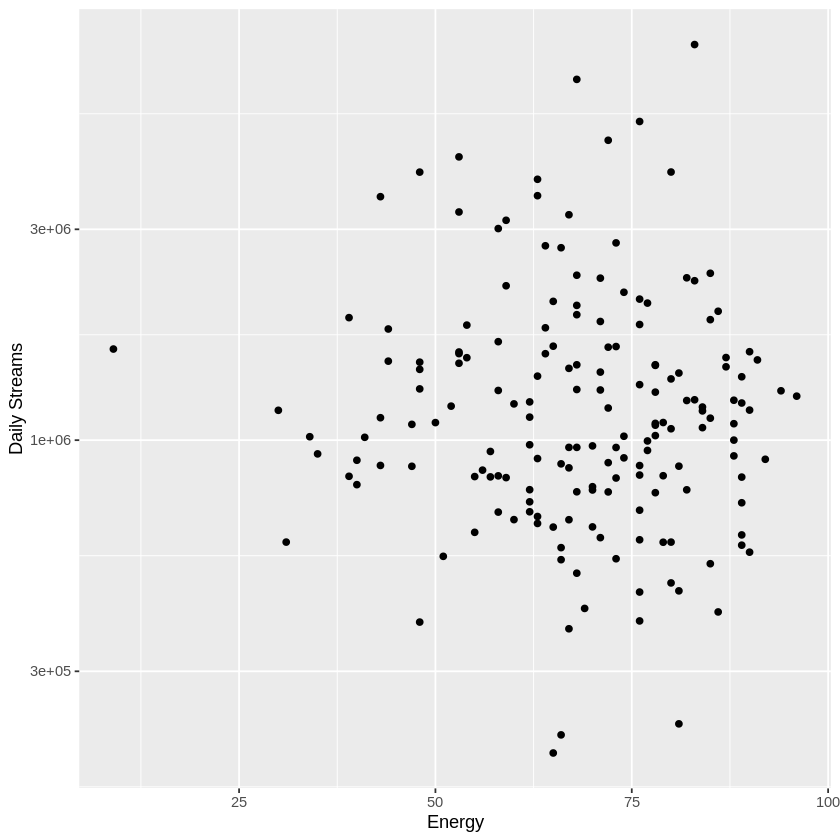

In [44]:
energy_plot <- ggplot(new_df, aes(x=`energy_%`, y=daily_streams)) + geom_point() + labs(x='Energy', y='Daily Streams')+scale_y_log10()
energy_plot

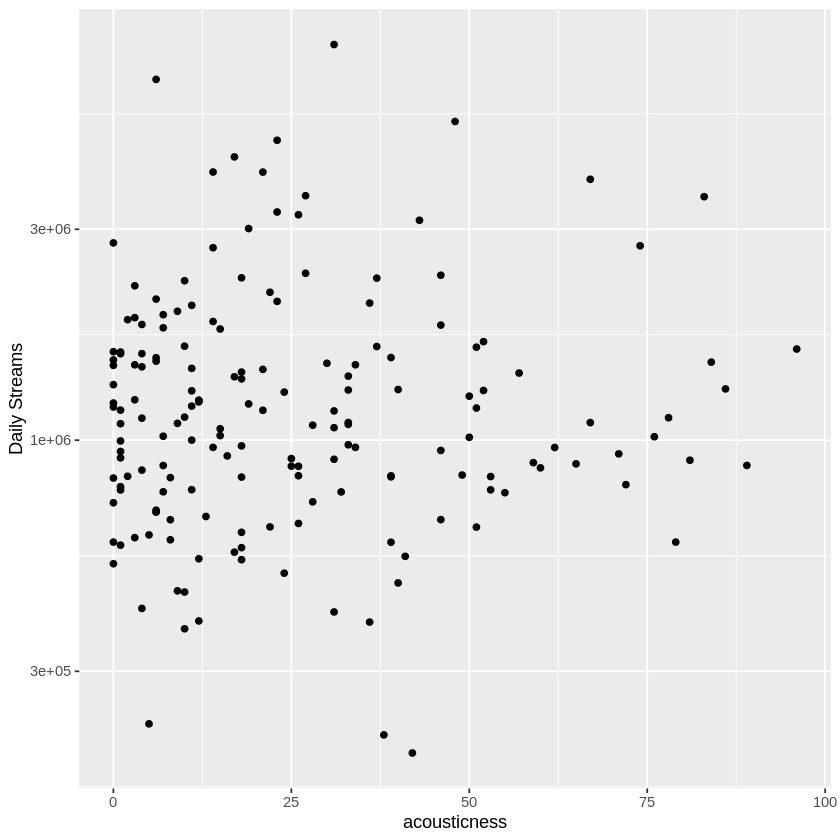

In [43]:
acousticness_plot <- ggplot(new_df, aes(x=`acousticness_%`, y=daily_streams)) + geom_point() + labs(x='acousticness', y='Daily Streams')+
                        scale_y_log10()
acousticness_plot